# Classificação linear, não-linear e Redes Neurais
#### Prof. Anderson Rocha Tavares (artavares@inf.ufrgs.br)

**Objetivo deste notebook**: verificar o funcionamento básico de regressão logística, suas limitações e como contorná-las via biblioteca scikit-learn, bem como ver o poder de redes neurais.


In [ ]:
# imports
import numpy as np          # para matrizes
import pandas as pd         # para manipulação de dados
from sklearn.model_selection import train_test_split  # para divisão dos dados
from sklearn.metrics import mean_squared_error, mean_absolute_error  # para métricas de avaliação de regressão
import matplotlib.pyplot as plt  # para plotagem dos gráficos
import unittest                  # pra realizacao dos testes automatizados


### Geração de dados

O conjunto de dados é gerado artificialmente, contendo apenas um atributo preditivo (x) e um atributo alvo (y).


In [ ]:
# Definindo os parâmetros para o conjunto de dados sintético de classificação
np.random.seed(0)
size = 200  # número de pontos

# Gerando dados que são linearmente separáveis
x_class = np.random.normal(loc=0, scale=1, size=size)
y_class = (x_class > 0).astype(int)  # Classe 0 se x <= 0, Classe 1 se x > 0

# Criando um DataFrame para visualizar os dados de classificação
data = pd.DataFrame({
    'x': x_class,
    'y': y_class
})

data.head()


,x,y
0,1.764052,1
1,0.400157,1
2,0.978738,1
3,2.240893,1
4,1.867558,1


A celula anterior gera e mostra os dados como tabela. Só olhando os números, não dá pra ver a relação entre eles. Vamos plotar. E, antes disso, vamos dividir em dados de treino e teste (holdout).

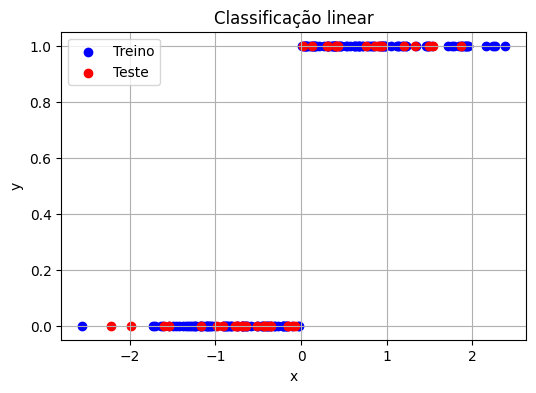

Formato de x_train antes do reshape: (160, 1)
Formato de x_test antes do reshape: (40, 1)
Formato de x_train  (linhas,colunas) depois do reshape: (160, 1)
Formato de x_test (linhas,colunas) depois do reshape: (40, 1)


In [ ]:
# Divisão dos dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(data[['x']], data['y'], test_size=0.2, random_state=0)

# exibição dos dados
plt.figure(figsize=(6,4))
plt.scatter(x_train, y_train, color='blue', label='Treino')
plt.scatter(x_test, y_test, color='red', label='Teste')
plt.title('Classificação linear')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Tecnicalidade: o formato de x_train é (160,), ou seja, 160 valores sem organização em linhas ou colunas.
# Respectivamente, o shape de x_test é (40,), ou seja, 40 valores sem organização em linhas ou colunas.
# Precisamos explicitar que temos 160 linhas e 1 coluna em x_train e 40 linhas e uma coluna em x_test. O reshape abaixo faz isso.

print(f'Formato de x_train antes do reshape: {x_train.shape}')
print(f'Formato de x_test antes do reshape: {x_test.shape}')
x_train_reshape = x_train.values.reshape(-1, 1)
x_test_reshape = x_test.values.reshape(-1, 1)
print(f'Formato de x_train  (linhas,colunas) depois do reshape: {x_train.shape}')
print(f'Formato de x_test (linhas,colunas) depois do reshape: {x_test.shape}')

# apos reshape, o shape de x_train e x_test deixa explicito o numero de linhas e colunas
# respectivamente, x_train fica com 160 linhas e 1 coluna; x_test fica com 40 linhas e 1 coluna

### Regressão linear simples

O código a seguir cria um objeto de regressão linear e obtém um modelo treinado a partir dos dados. O código também obtém os coeficientes (inclinação e intercepto) da reta, e os mostra.

Note que a reta não se ajusta bem aos pontos (underfitting). Observe o MAE e o MSE (quanto menor, melhor).

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



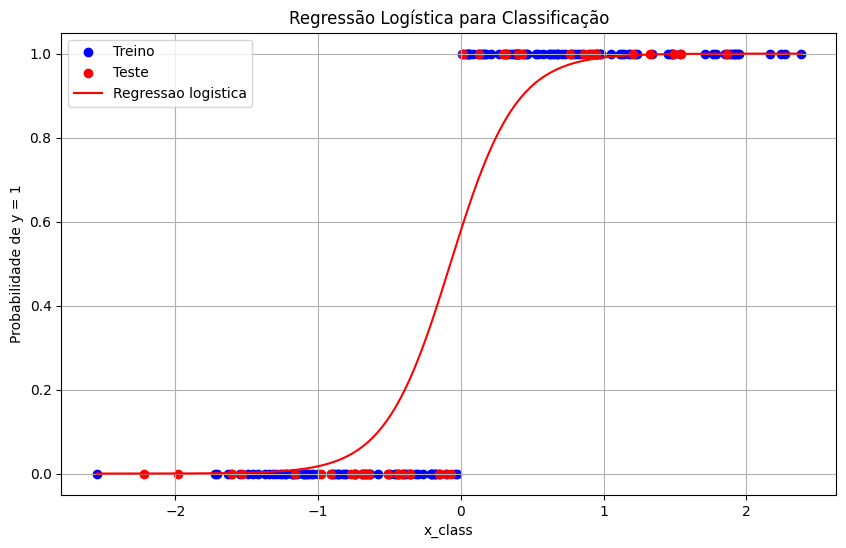

(0.975, 0.9714285714285714)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Ajustando um modelo de regressão logística
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

# Previsões do modelo
y_pred_class = logistic_model.predict(x_test)

# Calculando acurácia e F1-score
accuracy = accuracy_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

# Coordenadas para plotar a fronteira de decisão
x_values = np.linspace(data['x'].min(), data['x'].max(), 300)
y_values = logistic_model.predict_proba(x_values.reshape(-1, 1))[:, 1]

# Plotando os dados e a fronteira de decisão
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='blue', label='Treino')
plt.scatter(x_test, y_test, color='red', label='Teste')
plt.plot(x_values, y_values, color='red', label='Regressao logistica')
plt.title('Regressão Logística para Classificação')
plt.xlabel('x_class')
plt.ylabel('Probabilidade de y = 1')
plt.legend()
plt.grid(True)
plt.show()

(accuracy, f1)


## Caso não-linear

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



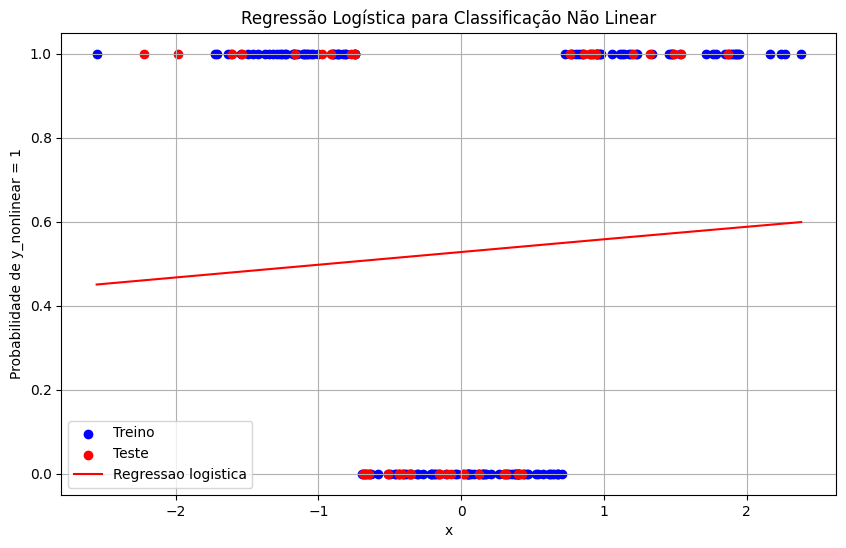

(0.12167213293444747, 0.11198016632660424, 0.35, 0.5185185185185185)

In [ ]:
# Gerando dados onde a fronteira de decisão não é linear
np.random.seed(0)
x_nonlinear = np.random.normal(loc=0, scale=1, size=size)
y_nonlinear = (x_nonlinear ** 2 > 0.5).astype(int)  # Classe 0 se x^2 <= 0.5, Classe 1 se x^2 > 0.5

# Criando um DataFrame para visualizar os dados de classificação não linear
data_nonlinear = pd.DataFrame({
    'x': x_nonlinear,
    'y': y_nonlinear
})

x_train, x_test, y_train, y_test = train_test_split(data_nonlinear[['x']], data_nonlinear['y'], test_size=0.2, random_state=0)

# Ajustando um modelo de regressão logística aos dados não lineares
logistic_model_nonlinear = LogisticRegression()
logistic_model_nonlinear.fit(x_train, y_train)

# Previsões do modelo
y_pred_nonlinear = logistic_model_nonlinear.predict(x_test)

# Calculando acurácia e F1-score para o modelo não linear
accuracy_nonlinear = accuracy_score(y_test, y_pred_nonlinear)
f1_nonlinear = f1_score(y_test, y_pred_nonlinear)

# Coordenadas para plotar a fronteira de decisão
x_values_nonlinear = np.linspace(data_nonlinear['x'].min(), data_nonlinear['x'].max(), 300)
y_values_nonlinear = logistic_model_nonlinear.predict_proba(x_values_nonlinear.reshape(-1, 1))[:, 1]

# Plotando os dados e a fronteira de decisão
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='blue', label='Treino')
plt.scatter(x_test, y_test, color='red', label='Teste')
plt.plot(x_values_nonlinear, y_values_nonlinear, color='red', label='Regressao logistica')
plt.title('Regressão Logística para Classificação Não Linear')
plt.xlabel('x')
plt.ylabel('Probabilidade de y_nonlinear = 1')
plt.legend()
plt.grid(True)
plt.show()

# Coeficientes do modelo não linear
coef_logistic_nonlinear = logistic_model_nonlinear.coef_[0][0]
intercept_logistic_nonlinear = logistic_model_nonlinear.intercept_[0]

(coef_logistic_nonlinear, intercept_logistic_nonlinear, accuracy_nonlinear, f1_nonlinear)


### Adicionando um 'atributo extra'

Nem tudo está perdido para a regressão linear. Como sabemos que a relação entre entrada e saída é quadrática, adicionamos um atributo preditivo extra que reflita isso. Ou seja, uma nova coluna no conjunto de dados, cujos valores são o quadrado do atributo preditivo original. O coeficiente encontrado para esse novo atributo na regressão é justamente o multiplicador de x^2 em uma equação de parábola.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



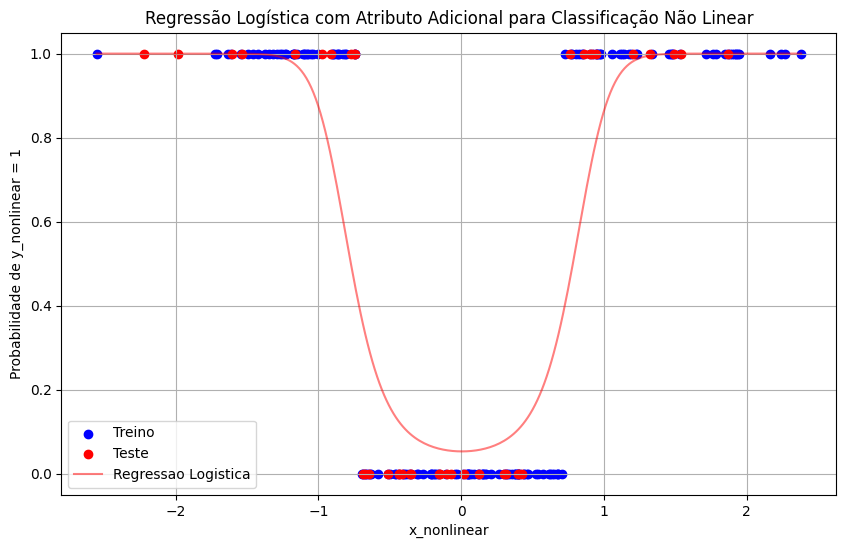

(array([-0.05653817,  4.7740888 ]),
 -2.886724237692485,
 0.9,
 0.8888888888888888)

In [ ]:
# Adicionando uma nova feature que é o quadrado do atributo original
data_nonlinear['x_squared'] = data_nonlinear['x'] ** 2
x_train, x_test, y_train, y_test = train_test_split(data_nonlinear[['x','x_squared']], data_nonlinear['y'], test_size=0.2, random_state=0)

# Ajustando um novo modelo de regressão logística com o atributo adicional
logistic_model_nonlinear_improved = LogisticRegression()
logistic_model_nonlinear_improved.fit(x_train, y_train)

# Previsões do novo modelo
y_pred_nonlinear_improved = logistic_model_nonlinear_improved.predict(x_test)

# Calculando acurácia e F1-score para o modelo melhorado
accuracy_nonlinear_improved = accuracy_score(y_test, y_pred_nonlinear_improved)
f1_nonlinear_improved = f1_score(y_test, y_pred_nonlinear_improved)

# Coordenadas para plotar a fronteira de decisão
x_values_improved = np.linspace(data_nonlinear['x'].min(), data_nonlinear['x'].max(), 300)
x_values_improved_squared = x_values_improved ** 2
y_values_improved = logistic_model_nonlinear_improved.predict_proba(np.column_stack((x_values_improved, x_values_improved_squared)))[:, 1]

# Plotando os dados e a fronteira de decisão melhorada
plt.figure(figsize=(10, 6))
#plt.scatter(x_train, y_train, color='blue', label='Treino')
#plt.scatter(x_test, y_test, color='red', label='Teste')
plt.scatter(x_train['x'], y_train, color='blue', label='Treino')
plt.scatter(x_test['x'], y_test, color='red', label='Teste')
plt.plot(x_values_improved, y_values_improved, color='red', alpha=0.5, label='Regressao Logistica')
plt.title('Regressão Logística com Atributo Adicional para Classificação Não Linear')
plt.xlabel('x_nonlinear')
plt.ylabel('Probabilidade de y_nonlinear = 1')
plt.legend()
plt.grid(True)
plt.show()

# Coeficientes do modelo melhorado
coef_logistic_nonlinear_improved = logistic_model_nonlinear_improved.coef_[0]
intercept_logistic_nonlinear_improved = logistic_model_nonlinear_improved.intercept_[0]

(coef_logistic_nonlinear_improved, intercept_logistic_nonlinear_improved, accuracy_nonlinear_improved, f1_nonlinear_improved)


## Plot 3D

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



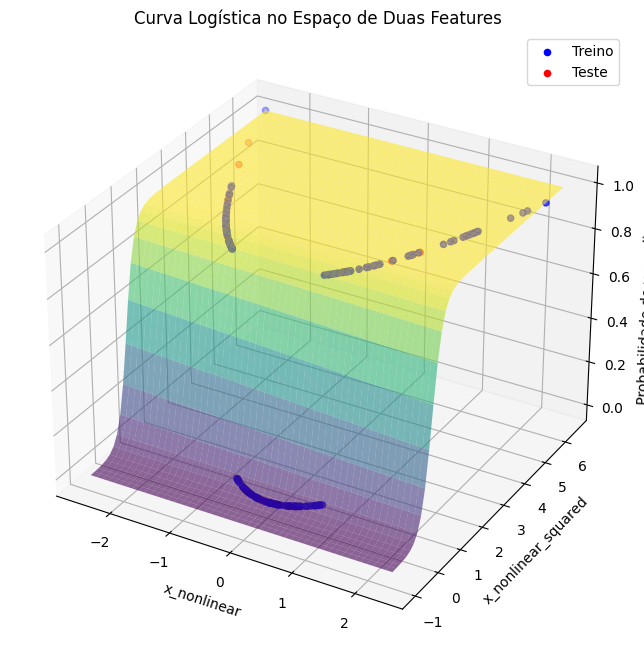

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Preparando os dados para o gráfico 3D
x_surface = np.linspace(data_nonlinear['x'].min(), data_nonlinear['x'].max(), 50)
x_surface_squared = np.linspace(data_nonlinear['x_squared'].min() -1, data_nonlinear['x_squared'].max(), 50) #-1 to adjust so all the curve appears
X1, X2 = np.meshgrid(x_surface, x_surface_squared)
X_flat = np.column_stack((X1.ravel(), X2.ravel()))
y_surface = logistic_model_nonlinear_improved.predict_proba(X_flat)[:, 1].reshape(X1.shape)

# Criando o gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, y_surface, cmap='viridis', alpha=0.6)
ax.set_title('Curva Logística no Espaço de Duas Features')
ax.set_xlabel('x_nonlinear')
ax.set_ylabel('x_nonlinear_squared')
ax.set_zlabel('Probabilidade de y_nonlinear = 1')

# Plotando os dados
ax.scatter(x_train['x'], x_train['x_squared'], y_train, color='b', label='Treino')
ax.scatter(x_test['x'], x_test['x_squared'], y_test, color='r', label='Teste')

# Adicionando legenda
ax.legend()

plt.show()


### Plot 3D interativo

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Surface(z=y_surface, x=X1, y=X2, colorscale='Viridis', opacity=0.6),
                      go.Scatter3d(x=x_test['x'], y=x_test['x_squared'], z=y_test,
                                   mode='markers', marker=dict(size=5, color='red'))])

fig.update_layout(title='Regressão Linear no Espaço 3D (2 Entradas, 1 Saída)',
                  scene=dict(
                      xaxis_title='x',
                      yaxis_title='x^2',
                      zaxis_title='y'),
                  autosize=False,
                  width=700, height=700,
                  margin=dict(l=65, r=50, b=65, t=90))

### Regressão com redes neurais

Podemos adicionar atributos extras para tornar linear um problema originalmente não-linear. Porém, pode ser difícil determinar como combinar ou estender os atributos existentes para fazer isso. Redes Neurais vem ao socorro, pois cada unidade (neurônio artificial) aprede alguma relação ou aspecto "oculto" nos dados.

O código abaixo mostra a criação de uma rede neural para os dados que estamos trabalhando.

A classe é MLPRegressor pelo seguinte: MLP é Multi-Layer Perceptron, uma rede neural de múltiplas camadas (isso torna possível o aprendizado de coisas "ocultas" nos dados). Regressor é porque estamos usando a rede neural para regressão.

Os hiperparâmetros da rede neural são:
- hidden_layer_sizes: uma sequência de números indicando quantos neurônios há em cada camada oculta da rede. Quanto maior, mais poder preditivo, porém maior o tempo de treinamento e risco de overfitting.
- max_iter: número de épocas, ou seja, passadas pelo conjunto de dados (redes neurais precisam passar várias vezes pelos dados, pois a cada vez, fazem pequenos ajustes). Quanto maior, mais chance da rede se ajustar bem aos dados, porém maior o tempo de treinamento
- random_state: não é um hiperparâmetro da rede neural em si, mas apenas configura o gerador de numeros aleatórios para que não haja variações em diferentes execuções do mesmo código.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



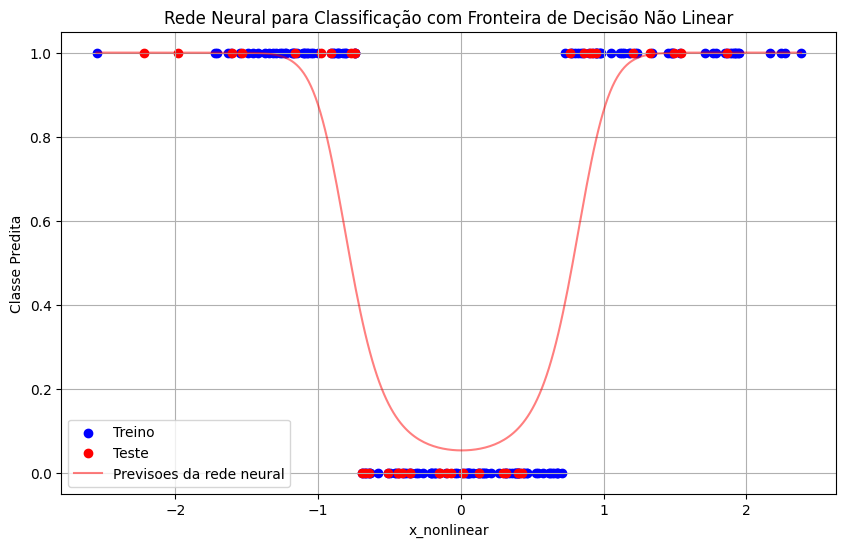

(1.0, 1.0)

In [ ]:
from sklearn.neural_network import MLPClassifier

# Ajustando novamente uma rede neural para classificação no dataset com fronteira de decisão não linear
nn_model_classification = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=0)
nn_model_classification.fit(x_train[['x']], y_train)

# Previsões da rede neural para classificação
y_pred_nn_classification = nn_model_classification.predict(x_test[['x']])

# Calculando acurácia e F1-score para a rede neural de classificação
accuracy_nn_classification = accuracy_score(y_test, y_pred_nn_classification)
f1_nn_classification = f1_score(y_test, y_pred_nn_classification)

# Plotando os dados e as previsões da rede neural para classificação
plt.figure(figsize=(10, 6))
plt.scatter(x_train['x'], y_train, color='blue', label='Treino')
plt.scatter(x_test['x'], y_test, color='red', label='Teste')

# Coordenadas para plotar a fronteira de decisão
x_values_improved = np.linspace(data_nonlinear['x'].min(), data_nonlinear['x'].max(), 300)
x_values_improved_squared = x_values_improved ** 2
y_values_improved = logistic_model_nonlinear_improved.predict_proba(np.column_stack((x_values_improved, x_values_improved_squared)))[:, 1]

# Plotando a fronteira de decisão da rede neural para classificação
plt.plot(x_values_improved, y_values_improved, color='red', alpha=0.5, label='Previsoes da rede neural')

plt.title('Rede Neural para Classificação com Fronteira de Decisão Não Linear')
plt.xlabel('x_nonlinear')
plt.ylabel('Classe Predita')
plt.legend()
plt.grid(True)
plt.show()

(accuracy_nn_classification, f1_nn_classification)


### Epílogo

Fique à vontade para testar modificações na rede neural para melhorar o desempenho (e.g. mais épocas de treino, mais neurônios, etc). Coisas não intuitivas podem acontecer (e.g. mais camadas fazem a rede ficar pior), mas é porque quanto mais parâmetros pra ajustar (mais neuronios e/ou camadas), mais passadas nos dados (épocas) são necessárias para se obter um bom ajuste.